In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import imghdr

## Prepare data

In [3]:
# Already divided data into train, val, test sets
train_dir = 'data/train'
val_dir = 'data/validate'
test_dir =  'data/test'

In [32]:
train_dir = 'data/data_small/split_data_20species/train'
val_dir = 'data/data_small/split_data_20species/val'
test_dir =  'data/data_small/split_data_20species/test'

In [33]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True)
train_set = train_datagen.flow_from_directory(
                                train_dir, 
                                target_size=(224, 224), 
                                batch_size=32, 
                                class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_set = val_datagen.flow_from_directory(
                            val_dir,
                            target_size=(224, 224),
                            batch_size=32,
                            class_mode='categorical')

Found 2882 images belonging to 20 classes.
Found 531 images belonging to 20 classes.


## Build deep learning model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=20, activation='softmax'))

In [37]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 56, 56, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 96)       

## Train

In [39]:
logdir='logs_data_small_20species'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
hist = model.fit(x=train_set, epochs=25, batch_size=32, validation_data=val_set, callbacks=[tensorboard_callback])

Epoch 1/25
91/91 [==============================] - 197s 2s/step - loss: 2.8445 - accuracy: 0.1298 - val_loss: 2.7132 - val_accuracy: 0.1356
Epoch 2/25
91/91 [==============================] - 194s 2s/step - loss: 2.3625 - accuracy: 0.2422 - val_loss: 2.2274 - val_accuracy: 0.2392
Epoch 3/25
91/91 [==============================] - 220s 2s/step - loss: 2.0186 - accuracy: 0.3598 - val_loss: 2.0023 - val_accuracy: 0.3070
Epoch 4/25
91/91 [==============================] - 178s 2s/step - loss: 1.8275 - accuracy: 0.4205 - val_loss: 1.8952 - val_accuracy: 0.3766
Epoch 5/25
91/91 [==============================] - 172s 2s/step - loss: 1.6861 - accuracy: 0.4722 - val_loss: 1.6472 - val_accuracy: 0.4746
Epoch 6/25
91/91 [==============================] - 182s 2s/step - loss: 1.5511 - accuracy: 0.4986 - val_loss: 1.5257 - val_accuracy: 0.4878
Epoch 7/25
91/91 [==============================] - 194s 2s/step - loss: 1.4570 - accuracy: 0.5350 - val_loss: 1.5778 - val_accuracy: 0.4840
Epoch 8/25
91

## Plot performance

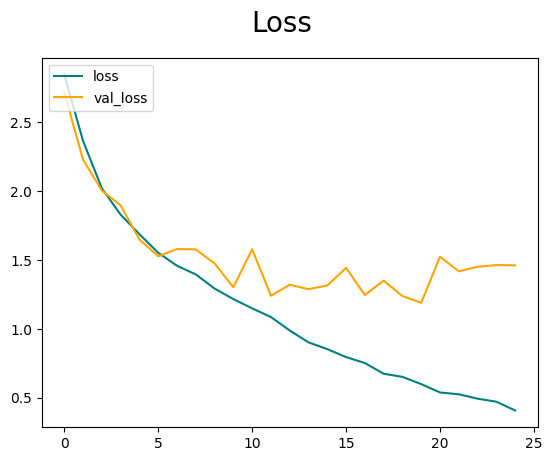

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

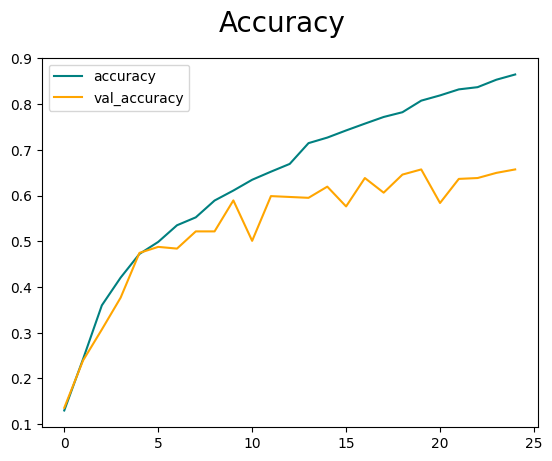

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_set = test_datagen.flow_from_directory(
#                             test_dir,
#                             target_size=(224, 224),
#                             batch_size=32,
#                             class_mode='categorical')

In [29]:
for batch in test_dir.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

AttributeError: 'str' object has no attribute 'as_numpy_iterator'

In [28]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.0, Recall: 0.0, Accuracy: 0.0


## Save model

In [44]:
model.save('models/flowers_20_small_data.h5')